## Sage Downloader Program

In [ ]:
#Sage Image Downloader Program

import sage_data_client
import requests

#shhhh its a secret cookie shhhhhhhh
cookie = ""
headers = {
    "Cookie": f"auth_sagecontinuum_org_sessionid={cookie}"
}


#grabs data needed
#change time stamp to get more or less images
df = sage_data_client.query(
    start="2024-06-03T18:00:00Z",
    end="2024-06-09T19:00:00.000Z", 
    filter={
        "plugin": "registry.sagecontinuum.org/theone/imagesampler:0.3.0.*",
        "vsn": "W01B"
    }
)

#this is where the images are located in the array
images = df.iloc[:, 2]

#take each image and download it
#stores it to a folder
for image in images:
    response = requests.get(image, headers=headers)
    if response.status_code == 200:
        #if( 'bottom' in image.rsplit('/', 3)[1]):
            #print(image.rsplit('/', 3)[1])    
           # with open(f"/home/rrearden/Documents/Code/SAGE/SageImgs/bottom/{image.rsplit('/', 1)[-1]}", 'wb') as f:
                #f.write(response.content)
        if('top' in image.rsplit('/', 3)[1]):
            with open(f"/home/rrearden/Documents/Code/SAGE/SageImgs/top/{image.rsplit('/', 1)[-1]}", 'wb') as f:
                f.write(response.content)
            



## Test Program with one image

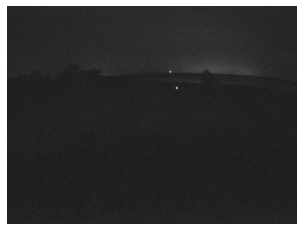

/home/rrearden/.local/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Label probs: tensor([[4.5491e-05, 9.9995e-01]])


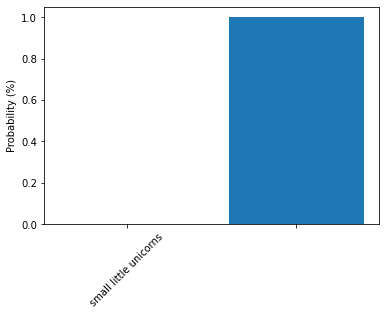

In [1]:
import torch
from PIL import Image
import open_clip
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
model.eval()  # model in train mode by default, impacts some models with BatchNorm or stochastic depth active
tokenizer = open_clip.get_tokenizer('ViT-B-32')

descriptions = ["small little unicorns", ""]

pic = '/home/rrearden/Documents/Code/SAGE/SageImgs/bottom/1717477214551752271-sample.jpg'
image = preprocess(Image.open(pic)).unsqueeze(0)
text = tokenizer(descriptions)


img = mpimg.imread(pic)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    

    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
print("Label probs:", text_probs)  # prints: [[1., 0., 0.]]

plt.bar(descriptions, text_probs.squeeze().detach().cpu().numpy())
plt.xticks(rotation=45)
plt.ylabel('Probability (%)')
plt.show()

## Image finder with Sections

In [10]:
import torch
from PIL import Image
import open_clip
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import walk


def split_image(image, grid_size=(2, 2)):
    width, height = image.size
    w_per_section = width // grid_size[0]
    h_per_section = height // grid_size[1]
    sections = []
    for y in range(grid_size[1]):
        for x in range(grid_size[0]):
            section = image.crop((x * w_per_section, y * h_per_section,
                                  (x + 1) * w_per_section, (y + 1) * h_per_section))
            sections.append(section)
    return sections



print("Please type a description \n")

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
model.eval()  # model in train mode by default, impacts some models with BatchNorm or stochastic depth active
tokenizer = open_clip.get_tokenizer('ViT-B-32')

userDescription = input() 

descriptions = [userDescription, "a random scene"]

filenames = next(walk('/home/rrearden/Documents/Code/SAGE/SageImgs/bottom/'), (None, None, []))[2]

text = tokenizer(descriptions)

for file in filenames:
    pic =f'/home/rrearden/Documents/Code/SAGE/SageImgs/bottom/{file}'
    #image = preprocess(Image.open(pic)).unsqueeze(0)
    image = Image.open(pic)
    sections = split_image(image, grid_size=(2, 2))  # Adjust grid size as needed
    for section in sections:
        # Preprocess and encode the section
        section_image = preprocess(section).unsqueeze(0)
        with torch.no_grad(), torch.cuda.amp.autocast():
            section_features = model.encode_image(section_image)
            text_features = model.encode_text(text)
            section_features /= section_features.norm(dim=-1, keepdim=True)
            text_features /= text_features.norm(dim=-1, keepdim=True)
            
            text_probs = (100.0 * section_features @ text_features.T).softmax(dim=-1)
        print((100.0 * section_features @ text_features.T).softmax(dim=-1))
        #print("Label probs:", text_probs)  # prints: [[1., 0., 0.]]
        if text_probs[0][0] > 0.8:
            #img = mpimg.imread(section)
            imgplot = plt.imshow(section)
            plt.axis('off')
            plt.show()
            plt.bar(descriptions, text_probs.squeeze().detach().cpu().numpy())
            plt.xticks(rotation=45)
            plt.ylabel('Probability (%)')
            plt.show()

Please type a description 

truck
tensor([[0.3023, 0.6977]])
tensor([[0.1963, 0.8037]])
tensor([[0.3008, 0.6992]])
tensor([[0.0699, 0.9301]])
tensor([[0.4800, 0.5200]])
tensor([[0.0924, 0.9076]])
tensor([[0.4967, 0.5033]])
tensor([[0.0158, 0.9842]])
tensor([[0.1843, 0.8157]])
tensor([[0.1637, 0.8363]])
tensor([[0.5322, 0.4678]])
tensor([[0.7307, 0.2693]])
tensor([[0.2301, 0.7699]])
tensor([[0.1186, 0.8814]])
tensor([[0.2986, 0.7014]])
tensor([[0.0526, 0.9474]])
tensor([[0.3290, 0.6710]])
tensor([[0.0624, 0.9376]])
tensor([[0.3269, 0.6731]])
tensor([[0.0366, 0.9634]])
tensor([[0.1597, 0.8403]])
tensor([[0.1034, 0.8966]])
tensor([[0.2670, 0.7330]])
tensor([[0.0331, 0.9669]])
tensor([[0.0050, 0.9950]])
tensor([[0.0429, 0.9571]])
tensor([[0.3774, 0.6226]])
tensor([[0.3951, 0.6049]])
tensor([[0.0745, 0.9255]])
tensor([[0.3406, 0.6594]])
tensor([[0.2375, 0.7625]])
tensor([[0.0567, 0.9433]])
tensor([[0.0132, 0.9868]])
tensor([[0.0354, 0.9646]])
tensor([[0.4074, 0.5926]])
tensor([[0.4491, 0.55

## Single Image Segmentation and IDing

Using cache found in /home/rrearden/.cache/torch/hub/pytorch_vision_v0.10.0


in this scene, there is a person riding a bike
0
tensor([[0.0077, 0.9923]])


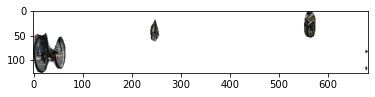

1
tensor([[1.7466e-04, 9.9983e-01]])


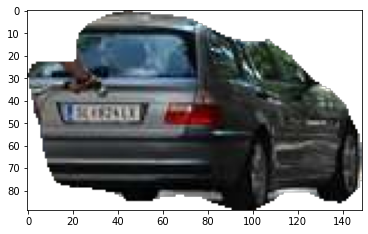

2
tensor([[0.0335, 0.9665]])


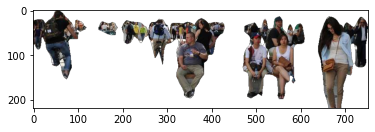

3
tensor([[0.6446, 0.3554]])


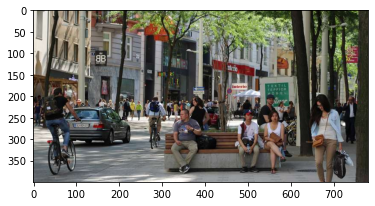

In [36]:
%matplotlib inline

import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from os import walk
%matplotlib inline
import urllib
url, filename = ("https://futurearchitectureplatform.org/media/cache/c1/02/c102718392d6da8c5669695f672030ae.jpg", "deeplab1.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
model.eval()

# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

input_image = Image.open(filename)
input_image = input_image.convert("RGB")
preprocess_seg = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess_seg(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)


array = output_predictions.byte().cpu().numpy()

result_image = Image.new("RGB", input_image.size)

diffFeats = np.unique(array[array != 0]) 
segmented_features = []

for feat in diffFeats:
    # Loop through each pixel in the prediction array
    class_image = Image.new("RGBA", input_image.size)
    for x in range(result_image.width):
        for y in range(result_image.height):
        # Get the predicted class for this pixel
            predicted_class = array[y, x]
        # If the predicted class is not 0 (background), use the original RGB color
            if predicted_class == feat:
                rgb_color = input_image.getpixel((x, y))  # Access original pixel color
                class_image.putpixel((x, y), rgb_color)
    segmented_features.append(class_image)

segmented_features.append(input_image)

###########################

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
model.eval()  # model in train mode by default, impacts some models with BatchNorm or stochastic depth active
tokenizer = open_clip.get_tokenizer('ViT-B-32')

userDescription = input() 

descriptions = [userDescription, ""]

text = tokenizer(descriptions)




for i, image in enumerate(segmented_features):
    print(f"{i}")
    
    image.save(f"class_{i}.png")
    image=Image.open(f"class_{i}.png")

    imageBox = image.getbbox()
    cropped = image.crop(imageBox)
    cropped.save(f"class_{i}.png")

    image = Image.open(f'class_{i}.png')
    plt.imshow(image)
    image = preprocess(image).unsqueeze(0)
    
    with torch.no_grad(), torch.cuda.amp.autocast():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text)
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

            
        
    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    print(text_probs)
    plt.show()


## EVERYTHING

truck


Using cache found in /home/rrearden/.cache/torch/hub/pytorch_vision_v0.10.0
/home/rrearden/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rrearden/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


getting next file
0


/home/rrearden/.local/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


1
2


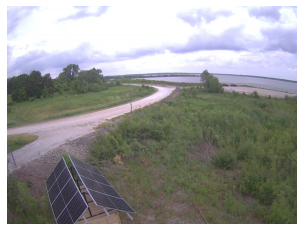

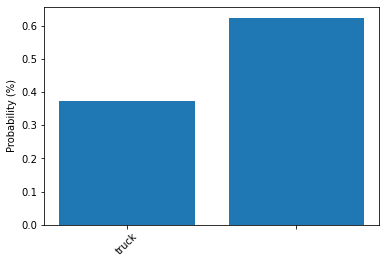

Using cache found in /home/rrearden/.cache/torch/hub/pytorch_vision_v0.10.0
/home/rrearden/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rrearden/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


getting next file
0


/home/rrearden/.local/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
Using cache found in /home/rrearden/.cache/torch/hub/pytorch_vision_v0.10.0


getting next file
0


Using cache found in /home/rrearden/.cache/torch/hub/pytorch_vision_v0.10.0


getting next file
0
1


Using cache found in /home/rrearden/.cache/torch/hub/pytorch_vision_v0.10.0


getting next file
0


Using cache found in /home/rrearden/.cache/torch/hub/pytorch_vision_v0.10.0


getting next file
0
1


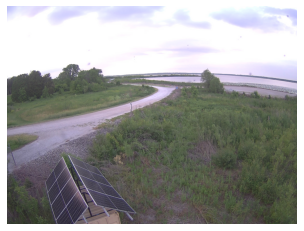

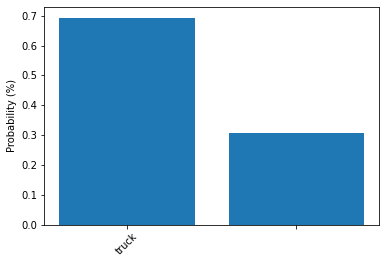

Using cache found in /home/rrearden/.cache/torch/hub/pytorch_vision_v0.10.0
/home/rrearden/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rrearden/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


getting next file
0


/home/rrearden/.local/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


1
2


Using cache found in /home/rrearden/.cache/torch/hub/pytorch_vision_v0.10.0


getting next file
0
1
2


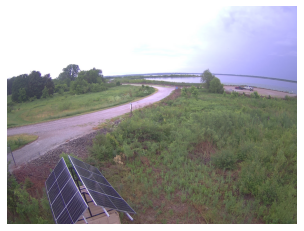

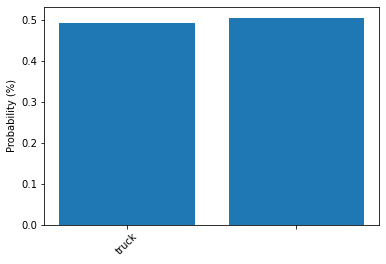

Using cache found in /home/rrearden/.cache/torch/hub/pytorch_vision_v0.10.0
/home/rrearden/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rrearden/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


getting next file
0


/home/rrearden/.local/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
Using cache found in /home/rrearden/.cache/torch/hub/pytorch_vision_v0.10.0


getting next file
0


Using cache found in /home/rrearden/.cache/torch/hub/pytorch_vision_v0.10.0


getting next file
0


Using cache found in /home/rrearden/.cache/torch/hub/pytorch_vision_v0.10.0


getting next file
0


Using cache found in /home/rrearden/.cache/torch/hub/pytorch_vision_v0.10.0


getting next file


KeyboardInterrupt: 

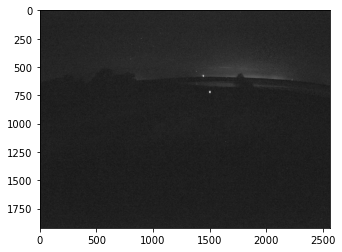

In [28]:
%matplotlib inline

import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from os import walk
%matplotlib inline



# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")


filenames = next(walk('/home/rrearden/Documents/Code/SAGE/SageImgs/bottom/'), (None, None, []))[2]

hasObject = False

userDescription = input() 

descriptions = [userDescription, ""]

text = tokenizer(descriptions)
    
for file in filenames:
    model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
    model.eval()
    print('getting next file')
    filename =f'/home/rrearden/Documents/Code/SAGE/SageImgs/bottom/{file}'
    input_image = Image.open(filename)
    input_image = input_image.convert("RGB")
    preprocess_seg = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    input_tensor = preprocess_seg(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
        output = model(input_batch)['out'][0]
    output_predictions = output.argmax(0)


    array = output_predictions.byte().cpu().numpy()

    result_image = Image.new("RGB", input_image.size)

    diffFeats = np.unique(array[array != 0]) 
    segmented_features = []

    for feat in diffFeats:
        # Loop through each pixel in the prediction array
        class_image = Image.new("RGBA", input_image.size)
        for x in range(result_image.width):
            for y in range(result_image.height):
            # Get the predicted class for this pixel
                predicted_class = array[y, x]
            # If the predicted class is not 0 (background), use the original RGB color
                if predicted_class == feat:
                    rgb_color = input_image.getpixel((x, y))  # Access original pixel color
                    class_image.putpixel((x, y), rgb_color)
        segmented_features.append(class_image)

    segmented_features.append(input_image)

    ###########################

    model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
    model.eval()  # model in train mode by default, impacts some models with BatchNorm or stochastic depth active
    tokenizer = open_clip.get_tokenizer('ViT-B-32')

    for i, image in enumerate(segmented_features):
        print(f"{i}")

        image.save(f"class_{i}.png")
        image=Image.open(f"class_{i}.png")

        imageBox = image.getbbox()
        cropped = image.crop(imageBox)
        cropped.save(f"class_{i}.png")

        image = Image.open(f'class_{i}.png')
        plt.imshow(image)
        image = preprocess(image).unsqueeze(0)

        with torch.no_grad(), torch.cuda.amp.autocast():
            image_features = model.encode_image(image)
            text_features = model.encode_text(text)
            image_features /= image_features.norm(dim=-1, keepdim=True)
            text_features /= text_features.norm(dim=-1, keepdim=True)



        text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        if text_probs[0][0] > 0.8:
            hasObject = True
    if hasObject:
        imgplot = plt.imshow(input_image)
        plt.axis('off')
        plt.show()
        plt.bar(descriptions, text_probs.squeeze().detach().cpu().numpy())
        plt.xticks(rotation=45)
        plt.ylabel('Probability (%)')
        plt.show()
        
        hasObject = False
